<a href="https://colab.research.google.com/github/ric4234/AI-Fridays/blob/main/Analisi%20Di%20Immagini/Transformers.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ARIMA Model

The ARIMA model is short for the Autoregressive (AR), Integrated (I) Moving Average (MA) model.
This model uses 3 processes:

*   The AR process, based on autocorrelations between past and
present values
*   The integrating (I) process. Integrating is a more mathematical synonym
for differencing a non-stationary time series. In ARIMA, this differencing is not anymore
done in advance of the modeling phase, but it is done during the model fit.
*   The MA process, based on correlations between past errors and
present values


The linear trend is a good example to try this model. More specifically, the values will not be stationary at all: they will
augment (or diminish) infinitely. Yet the difference between each value and the next is constant, so the
differenced time series is perfectly stationary.

The fact that the differencing is part of the hyperparameters has a great added value for
model building. This makes it possible to do automated hyperparameter tuning on the
number of times that differencing should be applied. In this example, data are weekly CO2 data that are available through the
statsmodels library.



In [ ]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer
!pip install py-espeak-ng

In [4]:
from transformers import pipeline

In [6]:
from transformers.utils import logging
logging.set_verbosity_error()

#from helper import ignore_warnings
#ignore_warnings()

In [8]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

In [90]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import io

def render_results_in_image(raw_image, pipeline_output):
    fig, ax = plt.subplots()  # Create a figure and axes

    # Render raw image
    ax.imshow(raw_image)
    ax.set_title('Processed Image')

    # Draw bounding boxes on the image
    for detection in pipeline_output:
        bbox = detection['box']
        label = detection['label']
        score = detection['score']

        # Draw bounding box
        rect = patches.Rectangle((bbox['xmin'], bbox['ymin']), bbox['xmax'] - bbox['xmin'], bbox['ymax'] - bbox['ymin'],
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add label and score as text inside the bounding box
        ax.text(bbox['xmin'], bbox['ymin'], f'{label}: {score:.2f}', fontsize=8, color='r', verticalalignment='top')

    plt.axis('off')  # Hide axes
    #plt.show()

    # Save figure to a buffer
    buf = io.BytesIO()
    a = plt.savefig(buf, format='jpg')
    buf.seek(0)

    # Open the buffer as an image using PIL
    pil_image = Image.open(buf)

    # Close the buffer
    #buf.close()

    # Return the PIL image
    return pil_image

In [82]:
from PIL import Image
import requests
from io import BytesIO

# Fetch image from URL
url = 'https://img.youtube.com/vi/IlIhykPDesE/hqdefault.jpg'  # Replace with your image URL
response = requests.get(url)
raw_image = Image.open(BytesIO(response.content))

raw_image.resize((569, 491))

pipeline_output = od_pipe(raw_image)

pipeline_output

[{'score': 0.9831472039222717,
  'label': 'person',
  'box': {'xmin': 0, 'ymin': 49, 'xmax': 228, 'ymax': 319}},
 {'score': 0.9904302954673767,
  'label': 'person',
  'box': {'xmin': 236, 'ymin': 52, 'xmax': 479, 'ymax': 320}}]

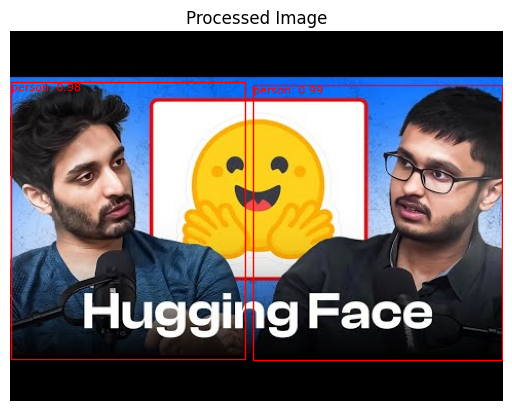

In [91]:
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

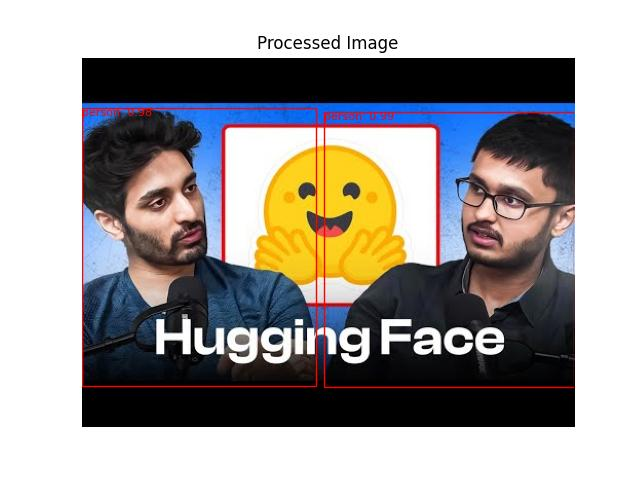

In [92]:
processed_image

In [93]:
import os
import gradio as gr

In [94]:
def get_pipeline_prediction(pil_image):

    pipeline_output = od_pipe(pil_image)

    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [95]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [96]:
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://499adf55f13e172a1a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [97]:
demo.close()

Closing server running on port: 7863
